<a href="https://colab.research.google.com/github/harrizazham98/DataScienceProj/blob/burned_area_prediction/DSonForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTION OF BURNED AREA ON FOREST**

*Features*

1)fire_id - unique id of the forest fire incident

2)X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

3)Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

4)month - month of the year: 'jan' to 'dec'

5)day - day of the week: 'mon' to 'sun'

6)FFMC - FFMC index from the FWI system: 18.7 to 96.20

7)DMC - DMC index from the FWI system: 1.1 to 291.3

8)DC - DC index from the FWI system: 7.9 to 860.6

9)ISI - ISI index from the FWI system: 0.0 to 56.10

10)temp - temperature in Celsius degrees: 2.2 to 33.30

11)RH - relative humidity in %: 15.0 to 100

12)wind - wind speed in km/h: 0.40 to 9.40

13)rain - outside rain in mm/m2 : 0.0 to 6.4


Target Attribute

area - the burned area of the forest (in ha): 0.00 to 1090.84 (This is the target attribute)


from - https://www.kaggle.com/c/forestfiresarea/data 


In [ ]:
# data analysis and wrangling
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#read the file input at a specific directory path
forest =pd.read_csv("/content/drive/MyDrive/CDLE2.0/data/forestfires.csv")
forest.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
#BEFORE
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
#replacing categorical into numerical values
forest.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7),inplace=True)

In [ ]:
#arrange the dataset, features in X and area(target) for y
X  = forest.drop("area",axis=1)
y = forest["area"]
print(X.shape)
print(y.shape)

(517, 12)
(517,)


In [ ]:
#get the name of features
X.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')

In [ ]:
#after
X.info()
#change the datatype from object to int64 for month and day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 48.6 KB


In [ ]:
#descriptive analysis
X.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9069df7d0>,
      dtype=object)

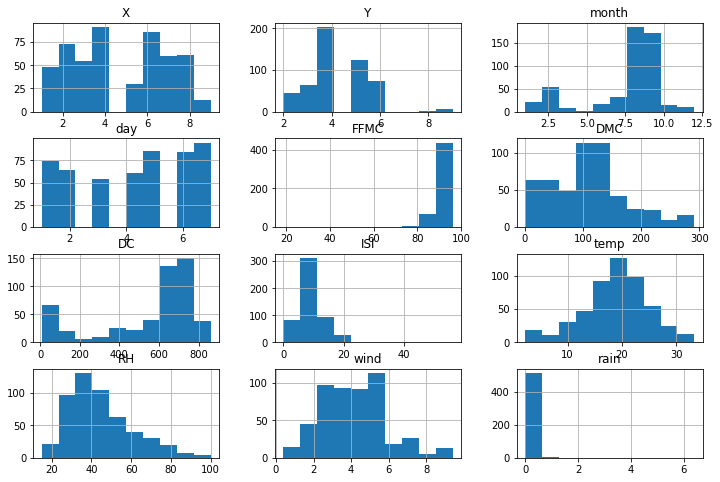

In [ ]:
#plot histogram graph for every features
fig = plt.figure(figsize=(12, 8))
X.hist(ax=fig.gca())

In [ ]:
forest.describe(include=['O']) #if column is in category

In [ ]:
forest.describe() #include=['O'] 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Text(0.5, 1.0, 'Correlation Map')

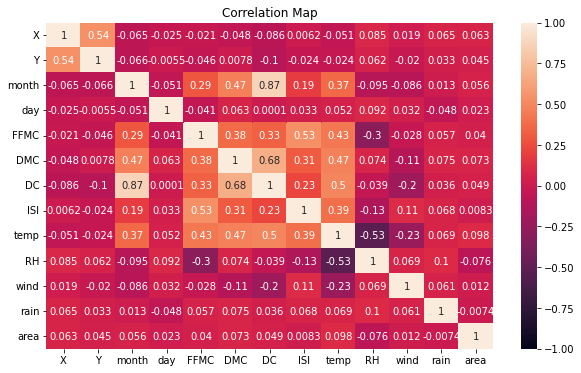

In [ ]:
f_corr = forest.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(f_corr, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Map", fontdict={'fontsize':12})


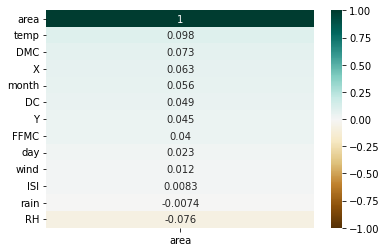

In [ ]:
# Correlation between feature and the label itself
heatmap = sns.heatmap(forest.corr()[['area']].sort_values(
    by='area', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Correlation between features and output

1) Positive correlation
- temp > DMC > X >month > DC > Y > FFMC

2) no correlation
ISI and rain because it almost approaches to zero

3) negative correlation
- RH


Text(0.5, 1.0, 'Scatter Plot')

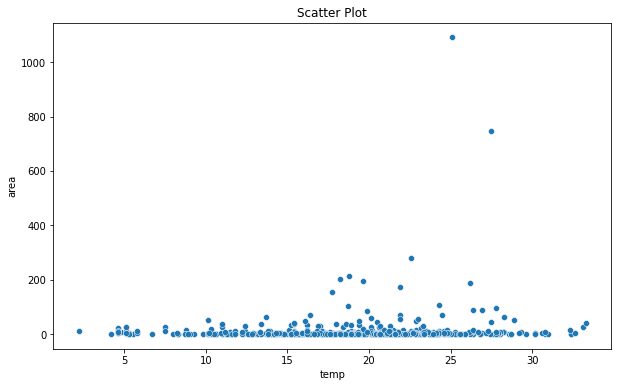

In [ ]:
#check the postive correlation
plt.figure(figsize=(10, 6))
sns.scatterplot( x="temp",y="area", data=forest)
plt.title("Scatter Plot", fontdict={'fontsize':12})

Text(0.5, 1.0, 'Scatter Plot')

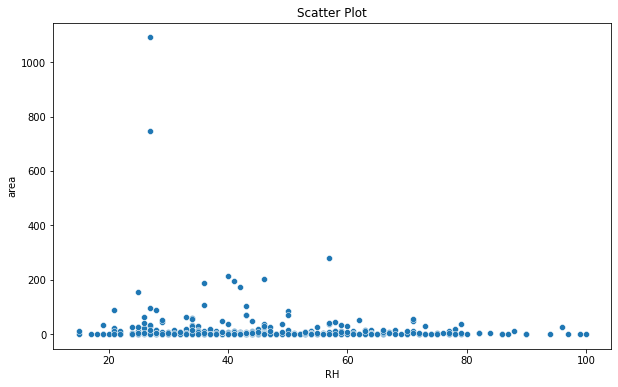

In [ ]:
#check negative correlation
plt.figure(figsize=(10, 6))
sns.scatterplot( x="RH",y="area", data=forest)
plt.title("Scatter Plot", fontdict={'fontsize':12})

Text(0.5, 1.0, 'Scatter Plot')

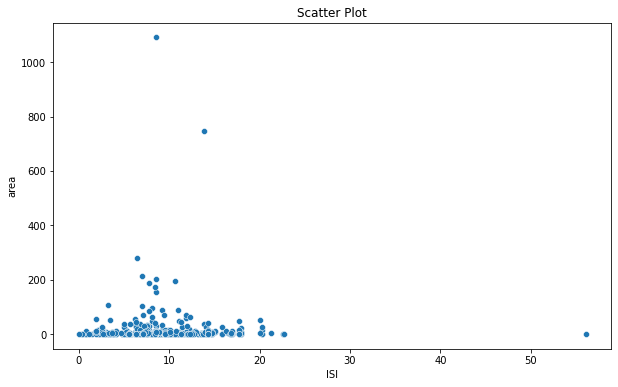

In [ ]:
#no correlation
plt.figure(figsize=(10, 6))
sns.scatterplot( x="ISI",y="area", data=forest)
plt.title("Scatter Plot", fontdict={'fontsize':12})

Text(0.5, 1.0, 'Scatter Plot')

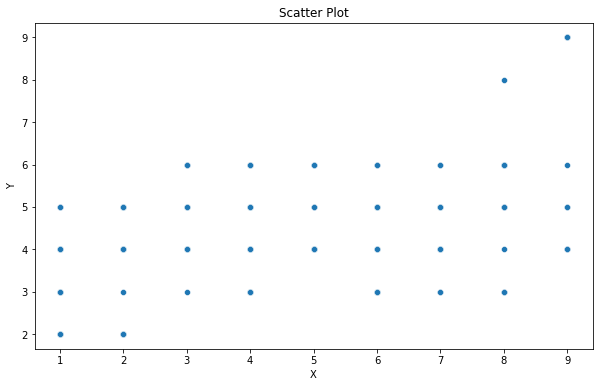

In [ ]:
#correlation between dependant variables
plt.figure(figsize=(10, 6))
sns.scatterplot( x="X",y="Y", data=forest)
plt.title("Scatter Plot", fontdict={'fontsize':12})

Regarding to X and Y, it has a high correlation. So I plan to combine these value by using hypothenus formula.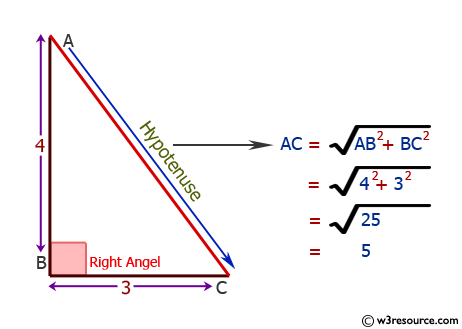 


In [ ]:
forest.X.pow(2)

0      49
1      49
2      49
3      64
4      64
       ..
512    16
513     4
514    49
515     1
516    36
Name: X, Length: 517, dtype: int64

In [ ]:
(forest.X.pow(2)+forest.Y.pow(2))**(1/2)

0       8.602325
1       8.062258
2       8.062258
3      10.000000
4      10.000000
         ...    
512     5.000000
513     4.472136
514     8.062258
515     4.123106
516     6.708204
Length: 517, dtype: float64

In [ ]:
forest["hypotenuse"]=(forest.X.pow(2)+forest.Y.pow(2))**(1/2)

In [ ]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,hypotenuse
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,8.602325
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,8.062258
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,8.062258
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,10.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,10.000000


In [ ]:
forest = forest.drop(["X","Y"], axis=1)

Text(0.5, 1.0, 'Correlation Map ')

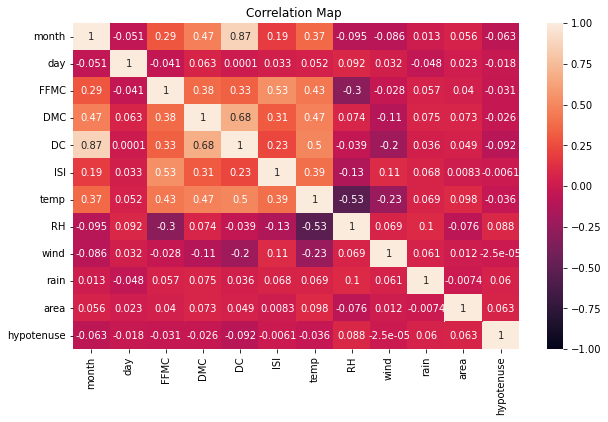

In [ ]:
f_corr = forest.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(f_corr, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Map ", fontdict={'fontsize':12})

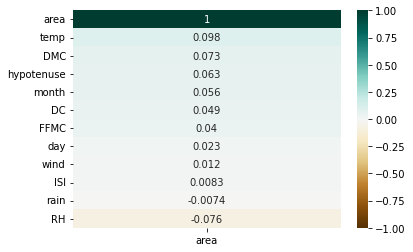

In [ ]:
# Correlation between feature and the label itself
heatmap = sns.heatmap(forest.corr()[['area']].sort_values(
    by='area', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system ON DMC and DC




In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot( x="DMC",y="DC", data=forest)
plt.title("Scatter Plot", fontdict={'fontsize':12})

Drop almost zero correlation

In [ ]:
forest = forest.drop(["ISI","rain"], axis=1)
forest.head()

,month,day,FFMC,DMC,DC,temp,RH,wind,area,hypotenuse
0,3,5,86.2,26.2,94.3,8.2,51,6.7,0.0,8.602325
1,10,2,90.6,35.4,669.1,18.0,33,0.9,0.0,8.062258
2,10,6,90.6,43.7,686.9,14.6,33,1.3,0.0,8.062258
3,3,5,91.7,33.3,77.5,8.3,97,4.0,0.0,10.000000
4,3,7,89.3,51.3,102.2,11.4,99,1.8,0.0,10.000000


In [ ]:

# Write the DataFrame to CSV file.
with open('/content/drive/My Drive/forest_v.csv', 'w') as f:
  forest.to_csv(f)

Convert ha to km2

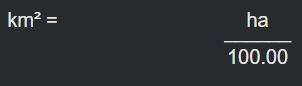

In [ ]:
forest["burned_area"] = forest.area/100.0

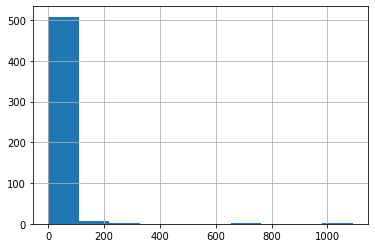

In [ ]:
y.hist()

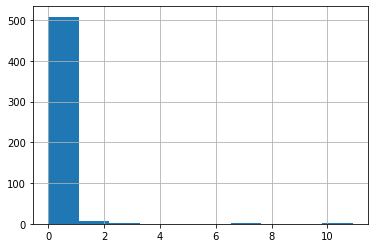

In [ ]:
y_bar =y/100.0
y_bar.hist()

In [ ]:
forest.head()

,month,day,FFMC,DMC,DC,temp,RH,wind,area,hypotenuse,burned_area
0,3,5,86.2,26.2,94.3,8.2,51,6.7,0.0,8.602325,0.0
1,10,2,90.6,35.4,669.1,18.0,33,0.9,0.0,8.062258,0.0
2,10,6,90.6,43.7,686.9,14.6,33,1.3,0.0,8.062258,0.0
3,3,5,91.7,33.3,77.5,8.3,97,4.0,0.0,10.000000,0.0
4,3,7,89.3,51.3,102.2,11.4,99,1.8,0.0,10.000000,0.0


In [ ]:
forest = forest.drop("area", axis=1)
forest.head()

,month,day,FFMC,DMC,DC,temp,RH,wind,hypotenuse,burned_area
0,3,5,86.2,26.2,94.3,8.2,51,6.7,8.602325,0.0
1,10,2,90.6,35.4,669.1,18.0,33,0.9,8.062258,0.0
2,10,6,90.6,43.7,686.9,14.6,33,1.3,8.062258,0.0
3,3,5,91.7,33.3,77.5,8.3,97,4.0,10.000000,0.0
4,3,7,89.3,51.3,102.2,11.4,99,1.8,10.000000,0.0


In [ ]:
# Write the DataFrame to CSV file.
with open('/content/drive/My Drive/forest_v2.csv', 'w') as f:
  forest.to_csv(f)

Text(0.5, 1.0, 'Correlation map on new dataset')

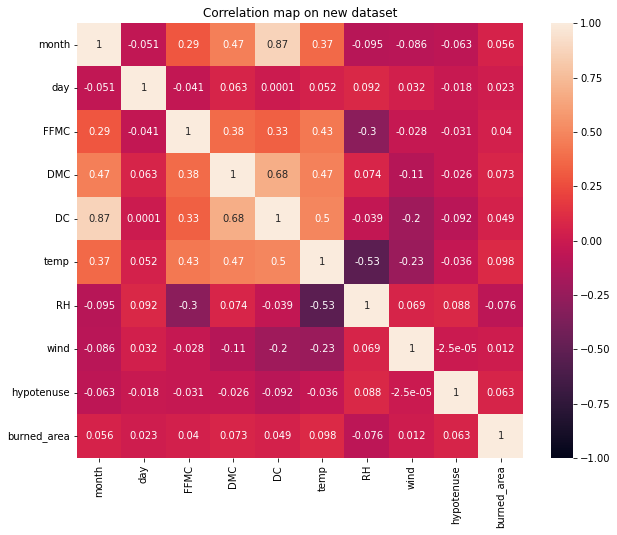

In [ ]:
final_corr = forest.corr()
plt.figure(figsize=(10,8))
sns.heatmap(final_corr, vmin=-1, vmax =1, annot=True)
plt.title("Correlation map on new dataset")

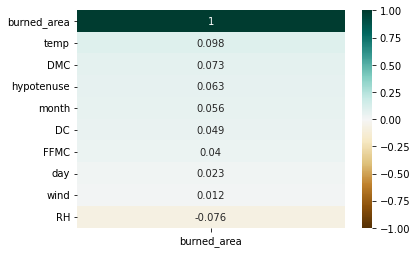

In [ ]:
# Correlation between feature and the label itself
heatmap = sns.heatmap(forest.corr()[['burned_area']].sort_values(
    by='burned_area', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
Xf = forest.drop("burned_area", axis=1)
Yf = forest["burned_area"]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
len(X_test)

156

In [ ]:
X_test.shape

(156, 9)

In [ ]:
X_test.head()

,month,day,FFMC,DMC,DC,temp,RH,wind,hypotenuse
304,5,6,85.1,28.0,113.8,11.3,94,4.9,7.810250
501,8,2,96.1,181.1,671.2,21.6,65,4.9,8.602325
441,8,1,92.1,207.0,672.6,25.5,29,1.8,10.000000
153,9,5,94.3,85.1,692.3,20.1,47,4.9,6.403124
503,8,3,94.5,139.4,689.1,29.2,30,4.9,4.472136


In [ ]:
check = X_test.to_numpy().reshape(156,9)

In [ ]:
check.shape

(156, 9)

In [ ]:
check[0,:]

In [ ]:
Y_test.head()

304    0.0000
501    0.0000
441    0.0123
153    0.0146
503    0.0195
Name: burned_area, dtype: float64

In [ ]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, Y_train)
logistic_prediction = logreg.predict(X_test)
logistic_accuracy = accuracy_score(Y_test, logistic_prediction)
print(logistic_accuracy)
print(confusion_matrix(y_test, logistic_prediction))
print(classification_report(y_test, logistic_prediction))